<a href="https://colab.research.google.com/github/charles01george/Humans_or_not_Sample/blob/main/Humans_or_not_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Import and become one with the data

In [81]:
import os
import tensorflow as tf

In [82]:
data = "/content/drive/MyDrive/Humans_or_Not_Sample_project"

In [83]:
os.listdir(data)

['Test', 'Train', 'Sample']

In [84]:
# Get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path("/content/drive/MyDrive/Humans_or_Not_Sample_project/Train")  # turn training path into a python path
class_names = np.array([item.name for item in data_dir.glob('*')])
print(class_names)

['Not_Humans' 'Humans']


In [85]:
# View random image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(data_dir, target_class):
  # Setup target directory
  target_folder = data_dir + target_class
  # Get random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read the image and plot it using matplotlib
  img = mpimg.imread(target_folder+"/"+random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")
  return img

Image shape: (4160, 3120, 3)


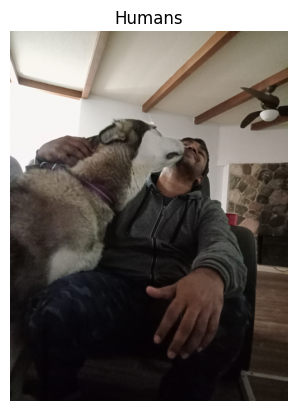

In [86]:
# Visualize the data
img = view_random_image(data_dir="/content/drive/MyDrive/Humans_or_Not_Sample_project/Train/",
                    target_class="Humans")

In [87]:
# View the image (array/tensor)
img

array([[[178, 178, 166],
        [177, 177, 165],
        [176, 176, 164],
        ...,
        [127, 125, 104],
        [121, 119,  98],
        [120, 118,  97]],

       [[176, 176, 164],
        [175, 175, 163],
        [173, 173, 161],
        ...,
        [128, 126, 105],
        [123, 121, 100],
        [121, 119,  98]],

       [[178, 178, 166],
        [175, 175, 163],
        [172, 172, 160],
        ...,
        [129, 127, 106],
        [125, 123, 102],
        [122, 120,  99]],

       ...,

       [[ 23,  24,  19],
        [ 24,  25,  20],
        [ 25,  26,  21],
        ...,
        [ 30,  25,  21],
        [ 30,  25,  21],
        [ 29,  24,  20]],

       [[ 27,  26,  24],
        [ 26,  25,  23],
        [ 26,  25,  23],
        ...,
        [ 29,  24,  20],
        [ 29,  24,  20],
        [ 28,  23,  19]],

       [[ 29,  28,  26],
        [ 28,  27,  25],
        [ 26,  25,  23],
        ...,
        [ 30,  25,  21],
        [ 31,  26,  22],
        [ 30,  25,  21]]

In [88]:
# Image shape
img.shape

(4160, 3120, 3)

Image shape: (4624, 3468, 3)
Image shape: (3024, 4032, 3)


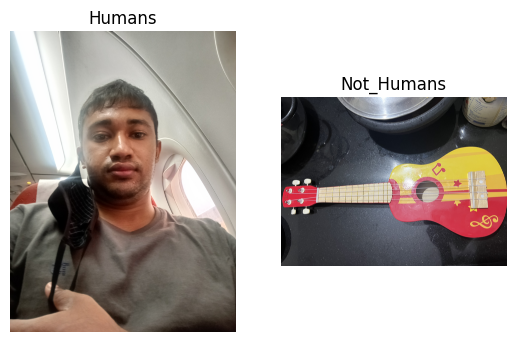

In [89]:
plt.figure()
plt.subplot(1, 2, 1)
humans = view_random_image("/content/drive/MyDrive/Humans_or_Not_Sample_project/Train/", "Humans")
plt.subplot(1, 2, 2)
not_humans = view_random_image("/content/drive/MyDrive/Humans_or_Not_Sample_project/Train/", "Not_Humans")

## 2. Preprocess the data(prepare it for a model)

Data is already split into training and test sets.

In [90]:
# Define training and test directory paths
train_dir = "drive/MyDrive/Humans_or_Not_Sample_project/Train/"
test_dir = "drive/MyDrive/Humans_or_Not_Sample_project/Test/"

Next step is to turn our data into batches

A batch is a small subset of the dataset a model looks at during training.I am using batch size of 32 and it has proven to be very effctive

To turn the data into batches, first create an instance of ImageDataGenerator for each of our datasets

In [91]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

The rescale parameter, along with 1/255 is divide all of the pizel values by 255(image pixel values were between 0 and 255). This results in all of the images being imported and their pixel values being normalized (converted to be between 0 and 1)

Now got a coulple of ImageDataGenerator instances, it can load our images from their respective directories using the flow_from_directory method.

In [92]:
# Turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               target_size=(224, 224),  # (height, width)
                                               class_mode="binary",     # classification problem type
                                               batch_size=4)           # how many images will be in each batch

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=4)

Found 40 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [93]:
# Get a sample of the training data batch
images, labels = train_data.next() # get the 'next' batch of imgaes/labels
len(images), len(labels)

(4, 4)

Images and labels are in batches of 4.

See what the images look like

In [94]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.2392157 , 0.3254902 , 0.40784317],
          [0.2509804 , 0.3372549 , 0.41960788],
          [0.2627451 , 0.34901962, 0.43137258],
          ...,
          [0.38431376, 0.4901961 , 0.5647059 ],
          [0.38431376, 0.4901961 , 0.5647059 ],
          [0.3803922 , 0.48627454, 0.56078434]],
 
         [[0.28235295, 0.3647059 , 0.44705886],
          [0.2784314 , 0.36078432, 0.4431373 ],
          [0.28235295, 0.36862746, 0.45098042],
          ...,
          [0.3921569 , 0.49803925, 0.57254905],
          [0.38823533, 0.49411768, 0.5764706 ],
          [0.39607847, 0.5019608 , 0.58431375]],
 
         [[0.29411766, 0.37254903, 0.4666667 ],
          [0.3137255 , 0.39607847, 0.4784314 ],
          [0.29803923, 0.38823533, 0.45882356],
          ...,
          [0.39607847, 0.5019608 , 0.5686275 ],
          [0.3921569 , 0.49803925, 0.5647059 ],
          [0.40000004, 0.5058824 , 0.57254905]],
 
         ...,
 
         [[0.00392157, 0.02745098, 0.01960784],
          [0.00392

In [95]:
# View the first batch of labels
labels

array([1., 1., 1., 0.], dtype=float32)

## 3. Create a model (Baseline)

To begin with, it's good to build a smaller model to acquite a baseline result which you try to improve upon.

```In deep learning a smaller model often refers to a model with less layers than the state of the art. For instance, a smaller model might have 3-4 layers where as a state of the art model, such as, ResNet50 might have 50+ layers```

Take a smaller version of the model (3 layer convolutional neural network)

In [96]:
# Make the creating of our model a little easier
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation

In [97]:
# Create the model (this can be our baseline, a 3 layer Convolutional Neural Network)
model_0 = Sequential([
    Conv2D(filters=10,
           kernel_size=3,
           strides=1,
           padding="valid",
           activation="relu",
           input_shape=(224, 224, 3)), # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (specify output shape)
])

In [98]:
# Compile the model
model_0.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

## 4. Fit the model

In [99]:
# Check lengths of training and test data generators
len(train_data), len(test_data)

(10, 5)

In [100]:
# Fit the model
history_0 = model_0.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data), # number of batches a model will go through per epoch
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
10/10 [==============================] - 8s 749ms/step - loss: 1.5504 - accuracy: 0.4750 - val_loss: 0.6711 - val_accuracy: 0.5000
Epoch 2/5
10/10 [==============================] - 8s 793ms/step - loss: 0.3932 - accuracy: 0.8750 - val_loss: 0.5935 - val_accuracy: 0.7000
Epoch 3/5
10/10 [==============================] - 7s 705ms/step - loss: 0.1882 - accuracy: 0.9500 - val_loss: 0.4923 - val_accuracy: 0.7500
Epoch 4/5
10/10 [==============================] - 8s 731ms/step - loss: 0.0820 - accuracy: 1.0000 - val_loss: 0.4765 - val_accuracy: 0.7500
Epoch 5/5
10/10 [==============================] - 7s 683ms/step - loss: 0.0381 - accuracy: 1.0000 - val_loss: 0.6912 - val_accuracy: 0.6000


## 5. Evaluate the model

Check out its trainig curves

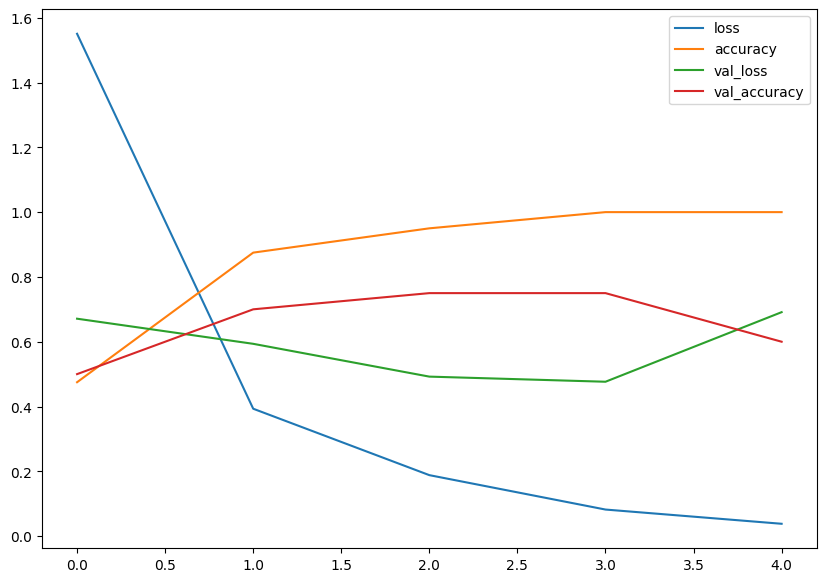

In [101]:
# Plot the training curves
import pandas as pd
pd.DataFrame(history_0.history).plot(figsize=(10, 7));

It looks like our model is overfitting the training dataset

> When a model's validation loss starts to increase, it's likely that it's overfitting the trainig dataset. This means, it's learning the patterns in the training dataset too well and thus its ability to generalize to unseen data will be diminished.



In [102]:
range(len(history_0.history['loss']))

range(0, 5)

In [103]:
# Plot the validation and training data seperately
def plot_loss_curve(history):
  """
  Returns seperate curves for training and validation metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

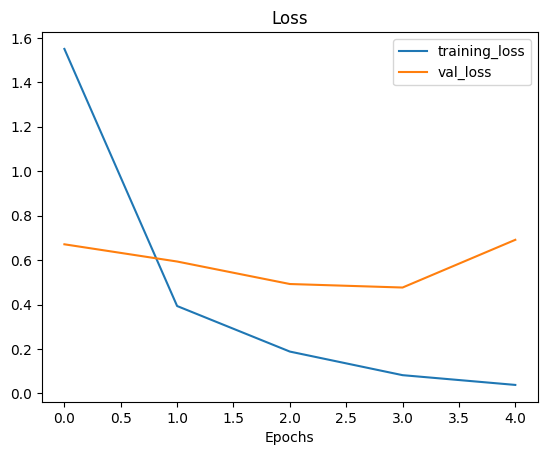

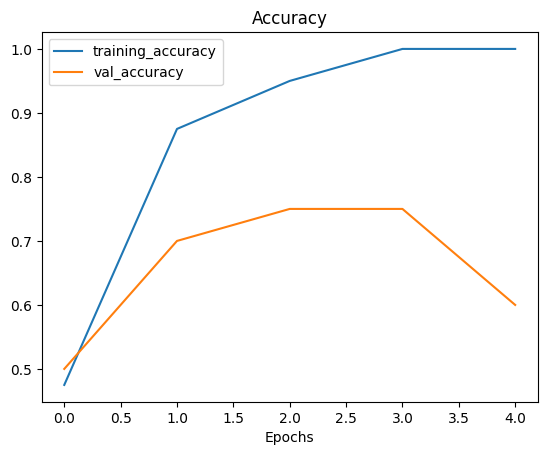

In [104]:
# Check out the loss curves of model_0
plot_loss_curve(history_0)

In [105]:
# Check out model's architecture
model_0.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_7 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_2 (Flatten)         (None, 475240)            0         
                                                                 
 dense_2 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477341 (1.82 MB)
Trainable params: 477341 (1.82 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 6. Reduce Overfitting

When a model performs too well on training data and poorly on unseen data, it is not much use.

To reduce overfitting

> Build a ConvNet with max pooling and data Augmentation

In [106]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20,  # rotate the image slightly between 0 and 20 degrees
                                             shear_range=0.2,  # shear the image
                                             zoom_range=0.2,  # zoom into the image
                                             width_shift_range=0.2,  # shift the image width ways
                                             height_shift_range=0.2,  # shift the image height ways
                                             horizontal_flip=True)

In [107]:
# Import data and augment it from directories
train_datagen_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                               target_size=(224, 224),
                                                                               batch_size=32,
                                                                               class_mode='binary',
                                                                               shuffle=True)


Found 40 images belonging to 2 classes.


In [108]:
# Create the model
model_1 = Sequential([
    Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(10, 3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation='sigmoid')
])

In [109]:
# Compile the model
model_1.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

In [110]:
len(train_datagen_augmented_shuffled)

2

In [111]:
# Fit the model
history_1 = model_1.fit(train_datagen_augmented_shuffled,
                        epochs=5,
                        steps_per_epoch=len(train_datagen_augmented_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
2/2 [==============================] - 7s 6s/step - loss: 0.7682 - accuracy: 0.4750 - val_loss: 0.8241 - val_accuracy: 0.5000
Epoch 2/5
2/2 [==============================] - 6s 5s/step - loss: 0.6932 - accuracy: 0.6250 - val_loss: 0.7146 - val_accuracy: 0.5000
Epoch 3/5
2/2 [==============================] - 6s 5s/step - loss: 0.6957 - accuracy: 0.4750 - val_loss: 0.7099 - val_accuracy: 0.4500
Epoch 4/5
2/2 [==============================] - 5s 4s/step - loss: 0.6712 - accuracy: 0.7500 - val_loss: 0.7195 - val_accuracy: 0.3500
Epoch 5/5
2/2 [==============================] - 6s 3s/step - loss: 0.6706 - accuracy: 0.7000 - val_loss: 0.7202 - val_accuracy: 0.4000


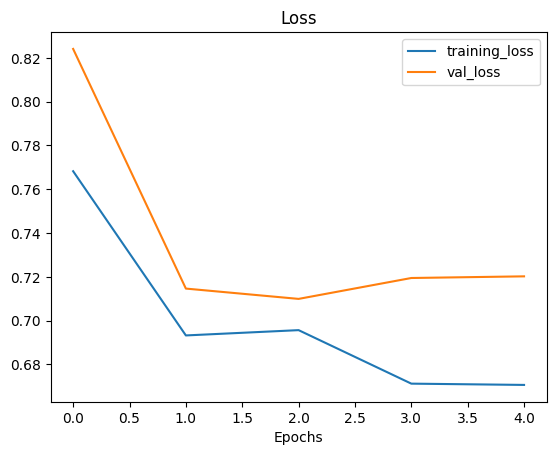

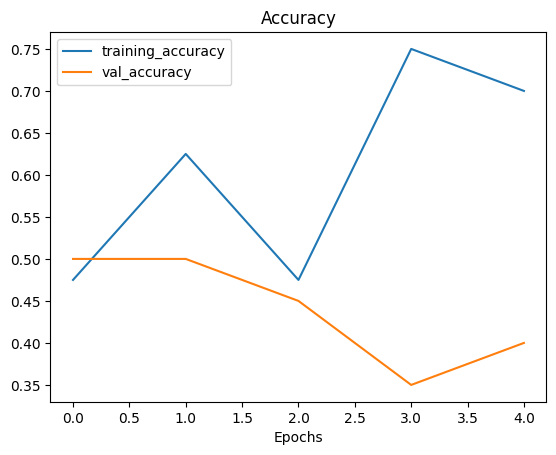

In [112]:
# Check model's performance history training on augmented data
plot_loss_curve(history_1)

Notice that how the performance on the training dataset improves as compared to model_0. This is because of the use of MaxPooling and Augmentation.

## 7. Making prediction with our trained model

I have been uploaded some images of humas and not_humas to my github for using predictions

In [113]:
# Classes we're working with
print(class_names)

['Not_Humans' 'Humans']


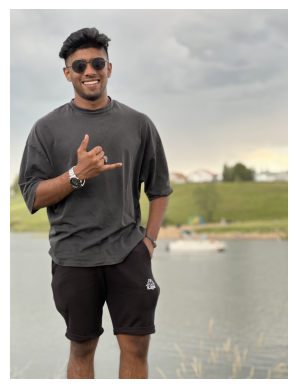

In [114]:
data = mpimg.imread("/content/drive/MyDrive/Humans_or_Not_Sample_project/Sample/Sample/IMG_2891.jpeg")
plt.imshow(data)
plt.axis(False);

In [115]:
# Check the shape of our image
data.shape

(4032, 3024, 3)

For model to make predictions on unseen data, the unseen data has to be in the same shape as your model has been trained on

In [116]:
# Create a function to import an image and resize it to be able to be used with model

def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshape
  it to (img_shape, img_shape, colour_channel)
  """

  # Read in target file
  img = tf.io.read_file(filename)
  # Turn it into a tensor
  img = tf.image.decode_image(img, channels=3)
  # Resize the image
  img = tf.image.resize(img, size=[img_shape, img_shape])
  # Rescale the image
  img = img/255.
  return img

In [117]:
# Load in an dpreprocess our custom image
data = load_and_prep_image("/content/drive/MyDrive/Humans_or_Not_Sample_project/Sample/Sample/154B218A-30B7-4DA5-ADBD-38DE0A971A6C.jpeg")
data

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.3643057 , 0.37214884, 0.36038414],
        [0.44460782, 0.45245096, 0.44068626],
        [0.22826096, 0.22826096, 0.22826096],
        ...,
        [0.54420847, 0.5520516 , 0.606003  ],
        [0.6914335 , 0.68135   , 0.6578311 ],
        [0.904582  , 0.9085036 , 0.8457585 ]],

       [[0.39406773, 0.409754  , 0.41367558],
        [0.80641264, 0.8103342 , 0.7808624 ],
        [0.3013107 , 0.3013107 , 0.3013107 ],
        ...,
        [0.7058828 , 0.6957989 , 0.71750706],
        [0.54117966, 0.5408995 , 0.5488827 ],
        [0.8932757 , 0.89719725, 0.8422953 ]],

       [[0.4632053 , 0.47104844, 0.46236497],
        [0.73753494, 0.7329131 , 0.70308113],
        [0.59787947, 0.60180104, 0.5821932 ],
        ...,
        [0.8082441 , 0.7964794 , 0.7693082 ],
        [0.52441907, 0.52357846, 0.5339435 ],
        [0.83991474, 0.8320716 , 0.7810912 ]],

       ...,

       [[0.40367877, 0.4507376 , 0.43539137],
        [0.40

Add an extra axis to equalize our dimension

In [118]:
# Add an extra axis
print(f"Shape before new dimension: {data.shape}")
data = tf.expand_dims(data, axis=0)  # add an extra dimension at axis 0
print(f"Shape after new dimension: {data.shape}")

Shape before new dimension: (224, 224, 3)
Shape after new dimension: (1, 224, 224, 3)


Our image has a batch size of 1, Let's make a prediction on it

In [119]:
# Make a prediction on our image tensor
pred = model_1.predict(data)
print(pred)

1/1 [==============================] - 0s 75ms/step
[[0.43584535]]


> We are working with binary classification problem, if the prediction probability is over 0.5, according to the model, the prediction is mostly likely to be the positive class (class 1). And if the prediction probability is under 0.5, the predicted class is most likely to be the negative class (class 0)

So let's write a little function to convert predictions into their class and then plot the target image

In [120]:
print(class_names)

['Not_Humans' 'Humans']


In [121]:
# Index the predicted class by rounding the prediction probability
pred_class = class_names[int(tf.round(pred))]
pred_class

'Not_Humans'

In [122]:
def pred_and_plot(model, filename, class_name):
  """
  Imports an image located at filename, make a prediction on it with
  a trained model and plots the image with the predicted class as the title
  """

  # Import the target image and preprocess it
  img = load_and_prep_image(filename)
  # Make a prediton
  pred = model.predict(tf.expand_dims(img, axis=0))
  # Get the predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predict the class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 30ms/step


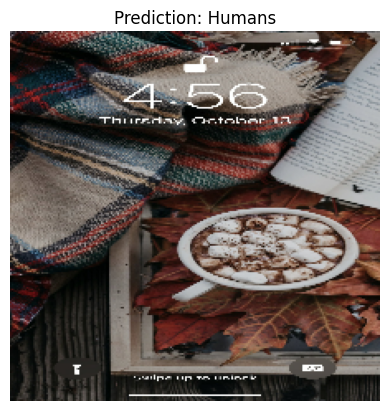

In [123]:
# Test our model on image
pred_and_plot(model_1, "/content/drive/MyDrive/Humans_or_Not_Sample_project/Sample/Sample/IMG_3441.jpeg", class_names)

Model prediction is wrong, Trying another image of humans

1/1 [==============================] - 0s 29ms/step


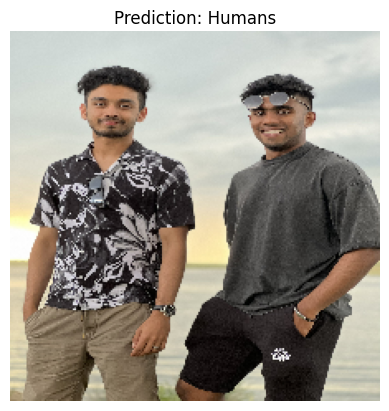

In [124]:
pred_and_plot(model_1, "/content/drive/MyDrive/Humans_or_Not_Sample_project/Sample/Sample/IMG_2929.jpeg", class_names)

Model predicted correctly, trying another image

1/1 [==============================] - 0s 29ms/step


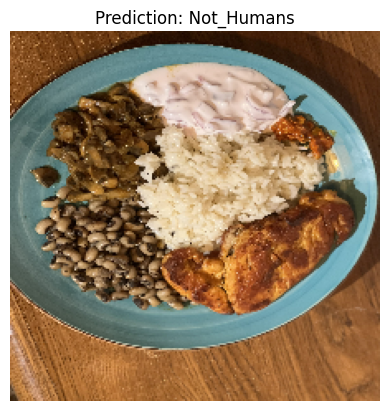

In [125]:
pred_and_plot(model_1, "/content/drive/MyDrive/Humans_or_Not_Sample_project/Sample/Sample/IMG_3239.jpeg", class_names)

Model predicted correctly